# Getting started with Image Processing




### Reading, saving, and displaying an image using PIL

In [1]:
from PIL import Image

In [151]:
import numpy as np

In [6]:
im=Image.open("C:/Users/Subitha/Desktop/CV Lab1/images/healthychild.jpg")

In [7]:
im.width, im.height, im.mode, im.format, type(im)

(7646, 5100, 'RGB', 'JPEG', PIL.JpegImagePlugin.JpegImageFile)

In [8]:
im.show()

##### convert() to grayscale

In [11]:
img = im.convert('L') # convert the RGB color image to a grayscale image

#1 - bit pixels, black and white
#L - 8-bit pixels, Greyscale
#P - 8-bit pixels, mapped to any other mode using a color palette
#RGB - 3×8-bit pixels, true color
#RGBA - 4×8-bit pixels, true color with transparency mask

##### save image to disk

In [12]:
img.save("C:/Users/Subitha/Desktop/CV Lab1/images/healthychild_greyscale.jpg")

##### open and show image in one line

In [19]:
Image.open(r"C:/Users/Subitha/Desktop/CV Lab1/images/healthychild_greyscale.jpg").show()











## Reading, saving, and displaying an image using Matplotlib

In [20]:
import matplotlib.image as mpimg

##### read image using matlplotlib.image

In [22]:
im1 = mpimg.imread("C:/Users/Subitha/Desktop/CV Lab1/images/yellow_flower.jpg")

In [24]:
im1.shape,type(im1),im1.dtype

((3456, 5184, 3), numpy.ndarray, dtype('uint8'))

##### diaplay image using matplotlib.pylab

In [25]:
import matplotlib.pylab as plt

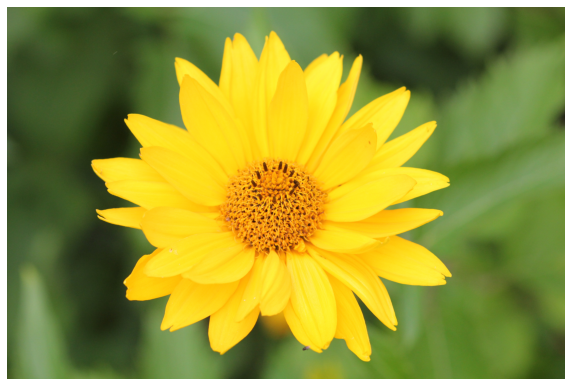

In [30]:
plt.figure(figsize=(10,15))
plt.imshow(im1)
plt.axis('off')
plt.show()

##### make image look darker   # destination is read only !!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!

In [159]:
'''im_dark = im1
im_dark.flags.writeable'''

'im_dark = im1\nim_dark.flags.writeable'

In [158]:
'''im_dark = np.asarray(Image.open('C:/Users/Subitha/Desktop/CV Lab1/images/yellow_flower.jpg'))
im_dark.flags.writeable'''

"im_dark = np.asarray(Image.open('C:/Users/Subitha/Desktop/CV Lab1/images/yellow_flower.jpg'))\nim_dark.flags.writeable"

In [160]:
'''plt.figure(figsize=(10,15))
plt.imshow(im_dark)
plt.axis('off')
plt.show()'''

"plt.figure(figsize=(10,15))\nplt.imshow(im_dark)\nplt.axis('off')\nplt.show()"

## Interpolating while displaying with matplotlib imshow

In [54]:
im = mpimg.imread("C:/Users/Subitha/Desktop/CV Lab1/images/aaa.jpg") # read the image from disk as a numpy ndarray

In [ ]:
methods = ['none', 'nearest', 'bilinear', 'bicubic', 'spline16', 'lanczos']

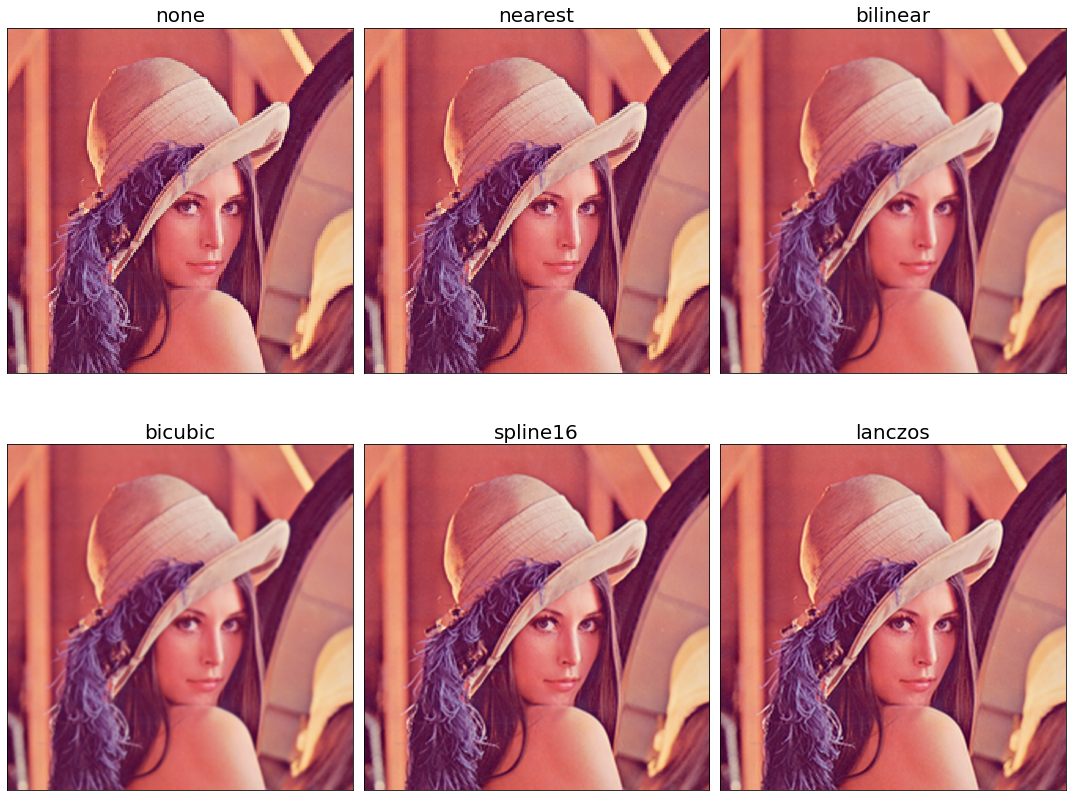

In [67]:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 12),subplot_kw={'xticks': [], 'yticks': []})
fig.subplots_adjust(hspace=0.1, wspace=0.05)
for ax, interp_method in zip(axes.flat, methods):
    ax.imshow(im, interpolation=interp_method)
    ax.set_title(str(interp_method), size=20)
plt.tight_layout()
plt.show()

# Dealing with different Image types and fileformats and performing basic image manipulations

### Basic image manipulation

##### Image manipulations with numpy array slicing

In [68]:
lena = mpimg.imread('C:/Users/Subitha/Desktop/CV Lab1/images/aaa.jpg')

In [139]:
lena.shape,lena.dtype,type(lena),lena.size
#from shape we know that image is RGB, from type we know its a nd array

((220, 220, 3), dtype('float32'), numpy.ndarray, 145200)

##### split image based on 3 rgb channels

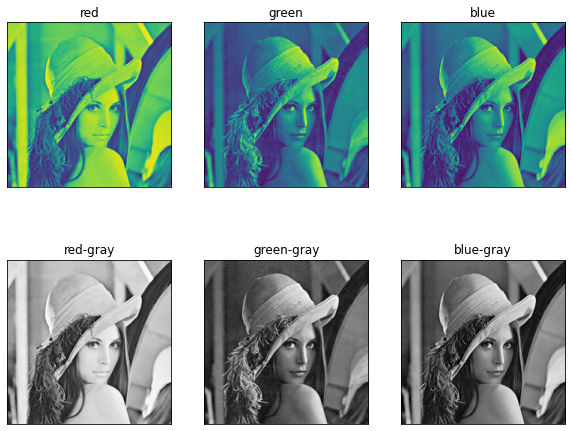

In [134]:
red = lena[:,:,0]
green = lena[:,:,1]
blue = lena[:,:,2]


fig,axes = plt.subplots(2,3,figsize=(10,8),subplot_kw= {'xticks':[],'yticks':[]})
channels = [red,blue,green,red,blue,green]
color = ['red','green','blue','red-gray','green-gray','blue-gray']
i=0
counter = 0
for ax,ch in zip(axes.flat,channels):
        if counter <=2 :
            ax.imshow(ch)       
        elif counter >2:
            ax.imshow(ch,cmap = 'gray')
        
        counter+=1
        ax.set_title(color[i])
        i+=1

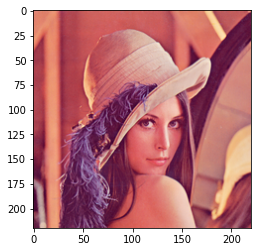

In [146]:
plt.imshow(lena)
plt.show()

In [147]:
lena.shape,lena[0,40]

((220, 220, 3), array([0.69803923, 0.29803923, 0.3372549 ], dtype=float32))

##### slicing

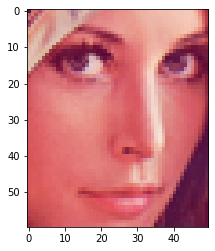

In [187]:
plt.imshow(lena[100:160,100:150])
plt.show()

In [196]:
lx,ly,ch=lena.shape # lx=220, ly=220, ch=3

In [212]:
x,y = np.ogrid[0:lx,0:ly] # open grid

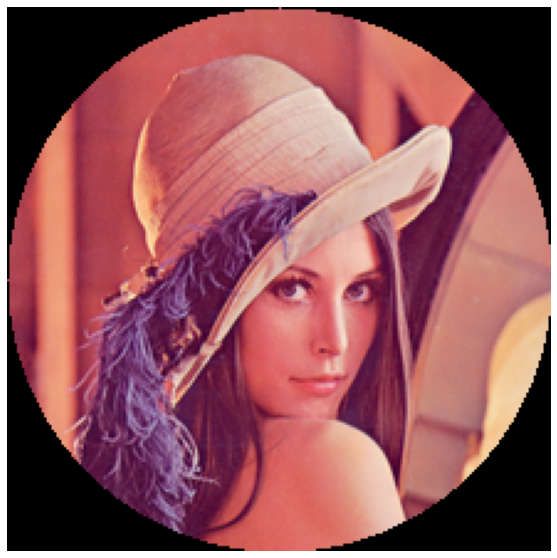

In [213]:
mask = (x - lx / 2) ** 2 + (y - ly / 2) ** 2 > lx * ly / 4
lena[mask,:] = 0 # masks
plt.figure(figsize=(10,10))
plt.imshow(lena)
plt.axis('off')
plt.show()

### Simple image morphing - α-blending of two images using cross-dissolving

In [264]:
messi = mpimg.imread("C:/Users/Subitha/Desktop/CV Lab1/images/messi.png")
ronaldo = mpimg.imread("C:/Users/Subitha/Desktop/CV Lab1/images/ronaldo.png")

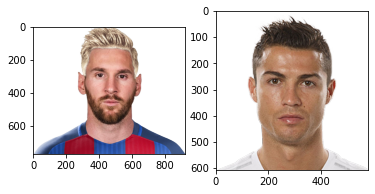

((771, 922, 4), (607, 581, 4))

In [265]:
plt.subplot(1,2,1)
plt.imshow(messi)
plt.subplot(1,2,2)
plt.imshow(ronaldo)
plt.show()

messi.shape,ronaldo.shape

In [266]:
messi = messi[0:607,200:700,0:3]
messi.shape
ronaldo = ronaldo[:,0:500,0:3]
messi.shape,ronaldo.shape

((607, 500, 3), (607, 500, 3))

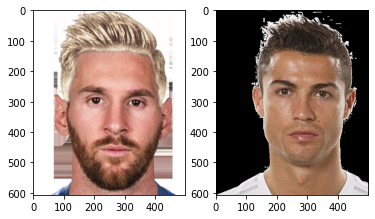

((607, 500, 3), (607, 500, 3))

In [267]:
plt.subplot(1,2,1)
plt.imshow(messi)
plt.subplot(1,2,2)
plt.imshow(ronaldo)
plt.show()

messi.shape,ronaldo.shape

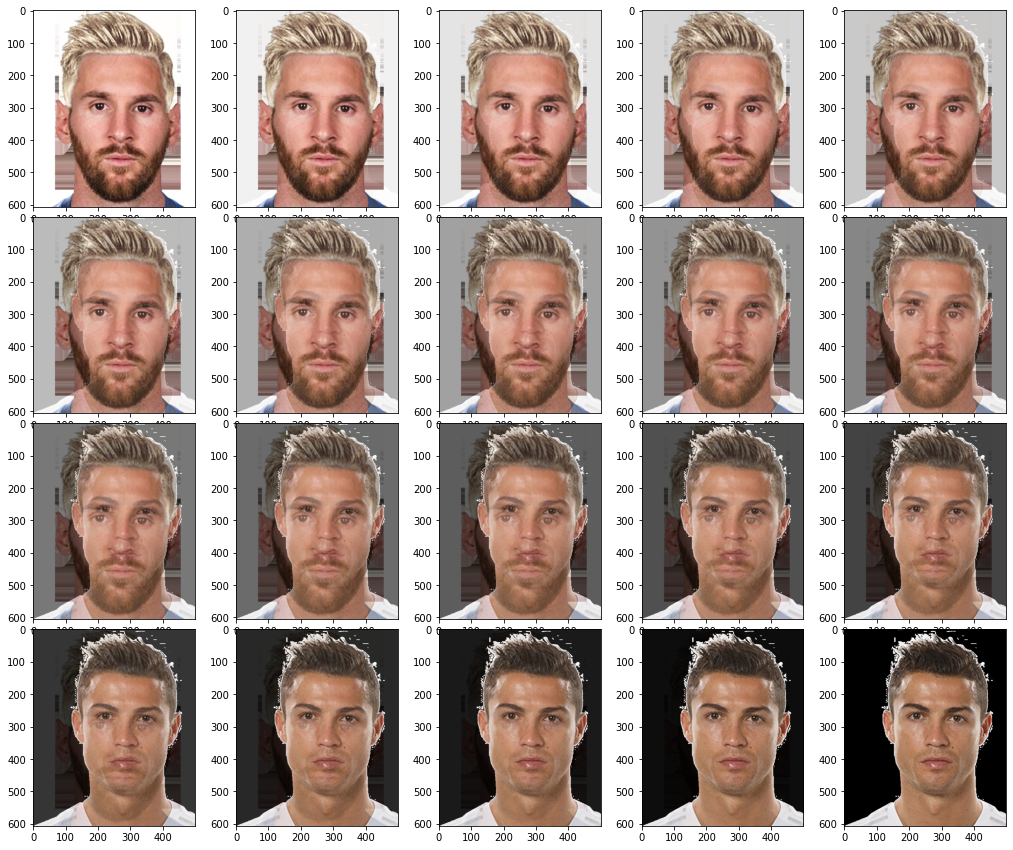

In [269]:
i = 1
plt.figure(figsize=(18,15))
for alpha in np.linspace(0,1,20):
    plt.subplot(4,5,i)
    plt.imshow((1-alpha)*messi + alpha*ronaldo)
    i += 1

plt.subplots_adjust(wspace=0.05, hspace=0.05)
plt.show()

### Image manipulations with PIL

In [325]:
im = Image.open("C:/Users/Subitha/Desktop/CV Lab1/images/healthychild.jpg")
im.show()
im.width,im.height,im.mode,im.format,type(im)

(7646, 5100, 'RGB', 'JPEG', PIL.JpegImagePlugin.JpegImageFile)

##### Cropping an image

In [309]:
im_c = im.crop([3000,500,4600,2500])

In [310]:
im_c.show()

##### Resizing an image

In [318]:

im_large = im.resize((im.width*5,im.height*5), Image.BILINEAR) # bi-linear interpolation

In [319]:
im_large.width,im_large.height,im_large.mode,im_large.format,type(im_large)

(38230, 25500, 'RGB', None, PIL.Image.Image)

In [322]:
im_small = im_large.resize((im_large.width//5,im_large.height//5),Image.ANTIALIAS)

C:\Users\Subitha\AppData\Local\Temp\ipykernel_9456\3242188746.py:1: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use LANCZOS or Resampling.LANCZOS instead.
  im_small = im_large.resize((im_large.width//5,im_large.height//5),Image.ANTIALIAS)


In [323]:
im_large.width,im_large.height,im_large.mode,im_large.format,type(im_large)

(38230, 25500, 'RGB', None, PIL.Image.Image)

##### Negating an image

In [326]:
im_n = im.point(lambda x: 255-x)
im_n.show()

##### Converting an image into grayscale

In [327]:
im_con = im.convert("L")
im_con.show()

##### Log transformation

In [330]:
im_log = im.point(lambda x : 255*np.log(1+(x/255)))
im_log.show()

##### Power-law transformation

In [340]:
im_pow = im.point(lambda x: 255*(x/255)**0.6).show()

##### Reflecting an image

In [1]:
im.transpose(Image.FLIP_LEFT_RIGHT).show()

In [3]:
im.transpose(Image.FLIP_TOP_BOTTOM).show()

##### Rotating an image

In [2]:
im.rotate(45).show()

### GEOMETRIC TRANSFORMATION

##### Applying an Affine transformation on an image

In [4]:
im.transform((int(1.4*im.width),im.height),Image.AFFINE,data = (1,-0.5,0,0,1,0)).show()

##### Perspective transformation

In [356]:
params = [1, 0.1, 0, -0.1, 0.5, 0, -0.005, -0.001]
im1 = im.transform((im.width//3, im.height), Image.PERSPECTIVE, params,Image.BICUBIC)
im.show()

### Changing pixel values of an image

In [358]:
im.size
im1=im.copy()

(7646, 5100)

In [383]:
n=5000
x = np.random.randint(0,im.width,n)
y = np.random.randint(0,im.height,n)

for (x,y) in zip(x,y):
    im.putpixel((x,y),((0,0,0) if np.random.rand() < 0.5 else (255,255,255)))
im1.show()

### Drawing on an image

In [417]:
draw = ImageDraw.Draw(im)

In [418]:
draw.ellipse((200,300,500,2000),fill = (100,150,200,155))

In [419]:
del draw
im.show()

### Drawing text on an image

In [437]:
draw = ImageDraw.Draw(im)

In [438]:
font = ImageFont.truetype("arial.ttf",155)

In [439]:
draw.text((10,10),"Healthy Child",font=font)

In [440]:
del draw
im.show()

### Creating a thumbnail

In [453]:
im2=im.copy()

In [454]:
im2.thumbnail((100,100))

In [456]:
im.paste(im2,(10,10))

In [457]:
im.save("C:/Users/Subitha/Desktop/CV Lab1/images/healthychild_thumbnail.jpg")

In [458]:
im.show()

### Computing the basic statistics of an image

In [459]:
import PIL.ImageStat as stat

In [460]:
s = stat.Stat(im)

In [462]:
s.extrema # max and min of R,G,B

[(0, 255), (0, 255), (0, 255)]

In [463]:
s.count

[38994600, 38994600, 38994600]

In [464]:
s.mean

[205.00593823247323, 151.44424110004974, 161.79407974437487]

In [465]:
s.median

[214, 149, 163]

In [466]:
s.stddev

[34.773995332500704, 34.77025145581842, 35.199349769224575]

### Plotting the histograms of pixel values for the RGB channels of an image

In [469]:
h = im.histogram()

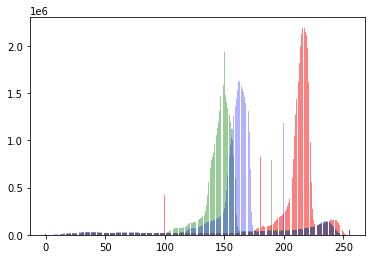

In [482]:
plt.bar(range(256),h[:256],color='r',alpha = 0.5 )
plt.bar(range(256),h[256:256*2],color = 'g',alpha = 0.4)
plt.bar(range(256),h[256*2:],color = 'b',alpha = 0.3)
plt.show()

### Separating the RGB channels of an image

In [505]:
im_r,im_g,im_b = im.split()

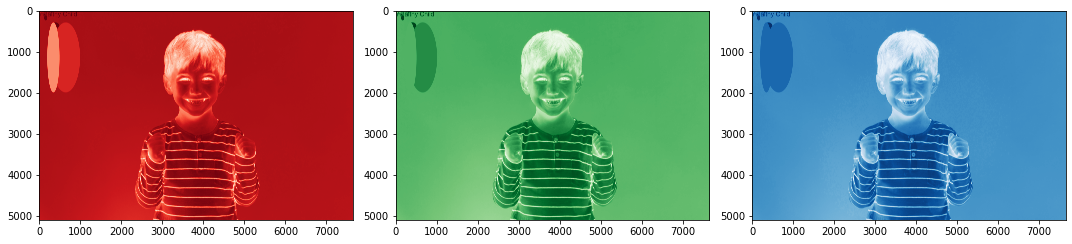

In [506]:
fig,axes = plt.subplots(1,3,figsize = (15,10))
axes[0].imshow(im_r,cmap = plt.cm.Reds)
axes[1].imshow(im_g,cmap = plt.cm.Greens)
axes[2].imshow(im_b,cmap = plt.cm.Blues)
plt.tight_layout()
plt.show()

### Combining multiple channels of an image

In [508]:
im_merge=Image.merge('RGB',(im_r,im_g,im_b))
im_merge.show()

### α-blending two images

In [524]:
im1 = Image.open("C:/Users/Subitha/Desktop/CV Lab1/images/messi1.png")
im2 = Image.open("C:/Users/Subitha/Desktop/CV Lab1/images/ronaldo.png")

In [525]:
im1.width,im1.height,im1.mode

(922, 771, 'RGBA')

In [526]:
im2.width,im2.height,im2.mode

(581, 607, 'RGBA')

In [527]:
im1 = im1.resize((im2.width,im2.height),Image.BILINEAR)
im1.width,im1.height,im1.mode

(581, 607, 'RGBA')

In [523]:
im = Image.blend(im1,im2,alpha=0.5).show()

### Superimposing two images

In [528]:
from PIL.ImageChops import add,multiply,subtract,difference

##### multiply

In [538]:
multiply(im1,im2).show()

##### add

In [537]:
add(im1,im2).show()

### difference

In [535]:
difference(im1,im2).show()

### subtract

In [536]:
subtract(im1,im2).show()